In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('forweb.csv')

In [3]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [4]:
# Memisahkan fitur dan target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']




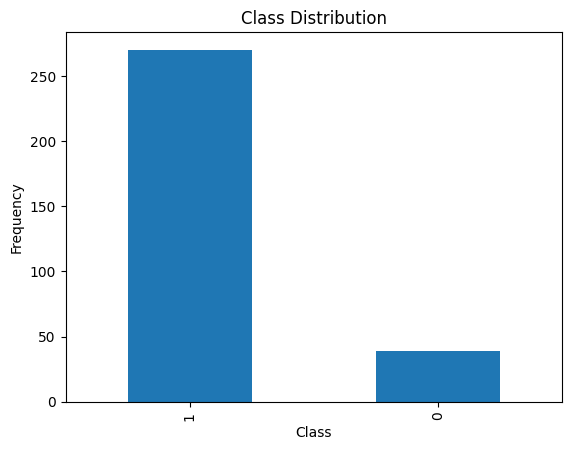

In [5]:
import matplotlib.pyplot as plt

# Mengecek distribusi kelas
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [6]:
from sklearn.utils import resample

# Menggabungkan fitur dan target menjadi satu DataFrame
df_combined = X.copy()
df_combined['LUNG_CANCER'] = y

# Memisahkan kelas mayoritas dan minoritas dengan benar
df_majority = df_combined[df_combined.LUNG_CANCER == 0]
df_minority = df_combined[df_combined.LUNG_CANCER == 1]

# Upsample kelas minoritas
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   # Mengambil sampel dengan pengembalian
                                 n_samples=len(df_majority),    # Menyamakan jumlah sampel dengan kelas mayoritas
                                 random_state=42) # Menjaga konsistensi hasil

# Menggabungkan kelas mayoritas dengan kelas minoritas yang telah di-oversample
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Memisahkan kembali menjadi fitur dan target
X_resampled = df_upsampled.drop('LUNG_CANCER', axis=1)
y_resampled = df_upsampled['LUNG_CANCER']


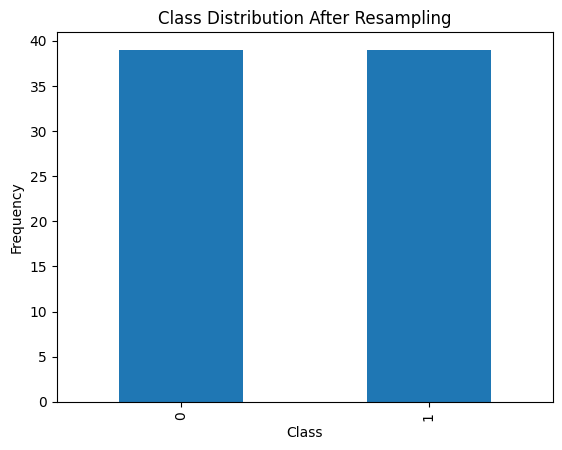

In [7]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Memisahkan kembali menjadi fitur dan target
X_resampled = df_upsampled.drop('LUNG_CANCER', axis=1)
y_resampled = df_upsampled['LUNG_CANCER']

# Mengecek distribusi kelas setelah penanganan ketidakseimbangan
y_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int32(1), int64(14)
memory usage: 35.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(probability=True)
}

# Menyimpan hasil evaluasi
results = {}

for name, model in models.items():
    # Melatih model dengan data yang telah di-resample
    model.fit(X_train, y_train)``
    
    # Membuat prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': cm
    }

# Menampilkan hasil
for name, metrics in results.items():
    print(f'Model: {name}')
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Model: Random Forest
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[9 0]
 [0 7]]

Model: Gradient Boosting
Accuracy: 0.9375
F1 Score: 0.9231
Precision: 1.0000
Recall: 0.8571
Confusion Matrix:
[[9 0]
 [1 6]]

Model: Logistic Regression
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[9 0]
 [0 7]]

Model: Support Vector Machine
Accuracy: 0.3750
F1 Score: 0.5455
Precision: 0.4000
Recall: 0.8571
Confusion Matrix:
[[0 9]
 [1 6]]



C:\Users\cicog\AppData\Local\Temp\ipykernel_18840\2254592916.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation=45, ha='right')


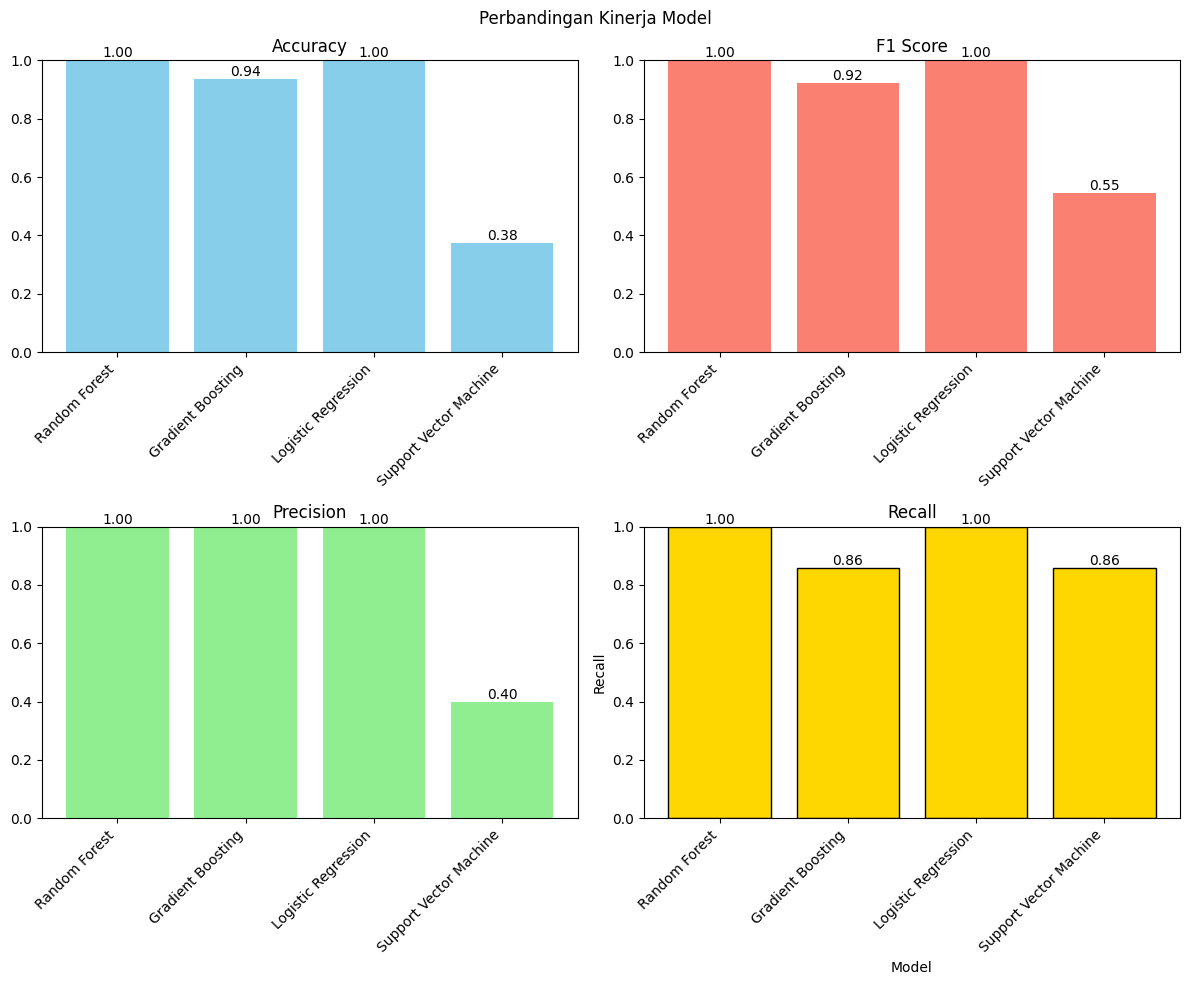

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Memisahkan metrik evaluasi dari hasil
accuracies = [metrics['Accuracy'] for metrics in results.values()]
f1_scores = [metrics['F1 Score'] for metrics in results.values()]
precisions = [metrics['Precision'] for metrics in results.values()]
recalls = [metrics['Recall'] for metrics in results.values()]

# List nama model
model_names = list(models.keys())

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting Accuracy
axs[0, 0].bar(model_names, accuracies, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Plotting F1 Score
axs[0, 1].bar(model_names, f1_scores, color='salmon')
axs[0, 1].set_title('F1 Score')
axs[0, 1].set_ylim(0, 1)

# Plotting Precision
axs[1, 0].bar(model_names, precisions, color='lightgreen')
axs[1, 0].set_title('Precision')
axs[1, 0].set_ylim(0, 1)

# Plotting Recall
axs[1, 1].bar(model_names, recalls, color='gold', edgecolor='black')  # Menambahkan kotak luarnya
axs[1, 1].set_title('Recall')
axs[1, 1].set_ylim(0, 1)

# Menambahkan label sumbu x dan y pada Recall
axs[1, 1].set_xlabel('Model')
axs[1, 1].set_ylabel('Recall')

# Menambahkan label pada sumbu x secara diagonal
for ax in axs.flat:
    ax.set_xticklabels(model_names, rotation=45, ha='right')

# Menambahkan label pada setiap bar
for ax in axs.flat:
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Menambahkan judul keseluruhan
plt.suptitle('Perbandingan Kinerja Model')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Model: Random Forest
Mean Accuracy: 0.8975
CV Results: [0.9375     0.875      0.875      0.93333333 0.86666667]

Model: Gradient Boosting
Mean Accuracy: 0.7967
CV Results: [0.8125     0.75       0.6875     0.93333333 0.8       ]

Model: Logistic Regression
Mean Accuracy: 0.8717
CV Results: [0.875      0.8125     0.9375     0.86666667 0.86666667]

Model: Support Vector Machine
Mean Accuracy: 0.5133
CV Results: [0.5        0.5625     0.4375     0.53333333 0.53333333]



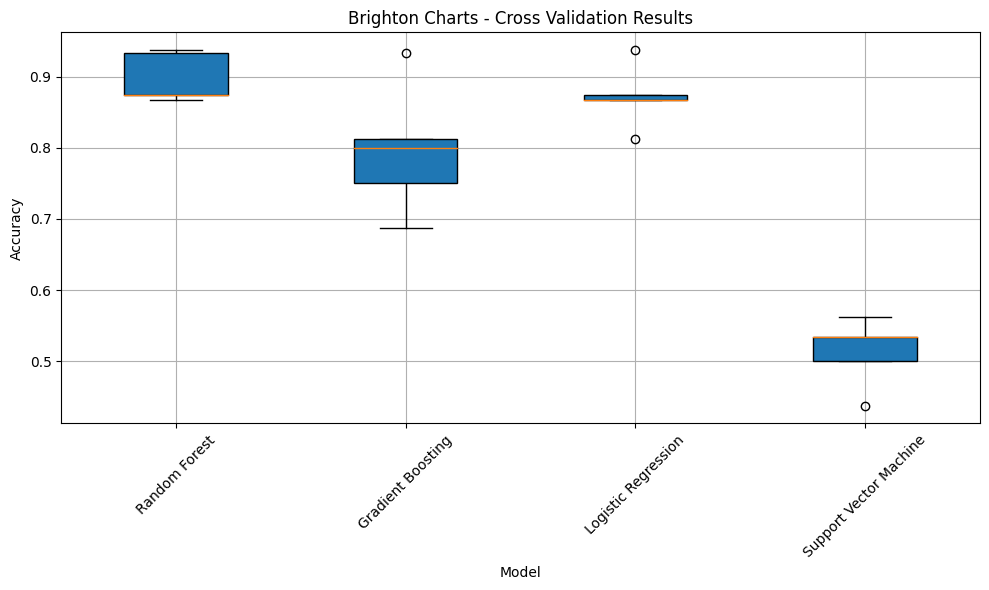

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Model
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(probability=True)
}

# Menyimpan hasil evaluasi
results = {}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Cross-validation
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    
    results[name] = {
        'Accuracy': np.mean(cv_results),
        'CV_Results': cv_results
    }

# Menampilkan hasil cross-validation
for name, metrics in results.items():
    print(f'Model: {name}')
    print(f"Mean Accuracy: {metrics['Accuracy']:.4f}")
    print(f"CV Results: {metrics['CV_Results']}\n")

# Plotting Brighton Charts
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
ax.boxplot([metrics['CV_Results'] for metrics in results.values()], labels=models.keys(), patch_artist=True)

# Menambahkan judul dan label
ax.set_title('Brighton Charts - Cross Validation Results')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

plt.show()


In [77]:
ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression(max_iter=10000)),
], voting='soft')

# Melatih model ansambel dengan data yang telah di-resample
ensemble_model.fit(X_train, y_train)

# Membuat prediksi
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluasi model ansambel
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Menampilkan hasil evaluasi model ansambel
print('Ensemble Model')
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"F1 Score: {f1_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"Confusion Matrix:\n{cm_ensemble}\n")

Ensemble Model
Accuracy: 0.9375
F1 Score: 0.9333
Precision: 0.8750
Recall: 1.0000
Confusion Matrix:
[[8 1]
 [0 7]]



In [74]:
import joblib

# Simpan model ansambel ke dalam file
joblib.dump(ensemble_model, 'ensemble_model.pkl')


['ensemble_model.pkl']

In [75]:
import pickle
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(model, f)